In [ ]:
# Classifications VICT et NSW
# 1) importer les modules nécessaires
# 2) lire les fichiers et concaténer les deux trames de données
# 3) Analyse sur NSW (régression logistique, KNN, random Forest)
# 4) Analyse sur VIC (régression logistique, KNN, forêt aléatoire)
# 5) Analyse sur VIC + NSW (régression logistique, KNN, random Forest)

# Notez que:
# la méthode de régression logistique ne converge pas, même en augmentant le nombre d'itérations.
# le meilleur et le KNN 
# Les données n'ont pas été traitées avec OVERSAMPLING en raison des limitations de mon ordinateur.


In [54]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn import ensemble
from sklearn.metrics import accuracy_score, classification_report
%matplotlib inline



In [108]:

#df = pd.read_csv('WeatherAUS_Clean.csv', sep=';')

#region = {'MountGinini':'NSW', 'Newcastle':'NSW', 'Penrith':'NSW', 'SalmonGums':'WAU',
#        'Launceston':'TAS', 'Melbourne':'VIC', 'CoffsHarbour':'NSW', 'Canberra':'NSW',
#        'BadgerysCreek':'NSW', 'Witchcliffe':'WAU', 'Dartmoor':'VIC', 'Richmond':'NSW',
#        'PearceRAAF':'WAU', 'NorahHead':'NSW', 'Cobar':'NSW', 'Walpole':'WAU', 'Ballarat':'VIC',
#        'Albany':'WAU', 'Sydney':'NSW', 'Wollongong':'NSW', 'Sale':'VIC', 'Woomera':'SAU',
#        'Williamtown':'NSW', 'Tuggeranong':'NSW', 'Portland':'VIC', 'Bendigo':'VIC',
#        'Albury':'NSW', 'Nuriootpa':'SAU', 'Brisbane':'QUE', 'Adelaide':'SAU', 'MountGambier':'SAU',
#        'Nhil':'VIC', 'Katherine':'NTE', 'Uluru':'NTE', 'SydneyAirport':'NSW', 'AliceSprings':'NTE',
#        'NorfolkIsland':'NSW', 'Mildura':'VIC', 'Darwin':'NTE', 'PerthAirport':'WAU', 'Moree':'NSW',
#        'GoldCoast':'QUE', 'Hobart':'TAS', 'Perth':'WAU', 'Townsville':'QUE', 'Cairns':'QUE',
#        'WaggaWagga':'NSW', 'MelbourneAirport':'VIC', 'Watsonia':'VIC'}


#df["Region"] = df["Location"].apply(lambda x: region.get(x))
#df.head(5)

#df.dropna(subset = ['RainToday','RainTomorrow'] , how = 'any', axis = 0, inplace = True)
#df.head()


In [109]:
#Je récupère les données radar
#villesref=pd.read_csv("VilleRef2.csv",sep=";")
#villesref.head()
#dict_villes={}
#for idx_ville,ligne in villesref.iterrows():
#    dict_villes[ligne['Ville']] = ligne['Radar']
#dict_villes
#villesref.head()

In [110]:

#def get_radar(df_1, villesref):
    
#    ''' this function read two dataframe:
#        1)  df_1 contain a column called Location
#        2)  df_2 contain a column called Ville3
#        if the location are equals to the villes, 
#        this function extract from the dictionary
#        called dict_villes the radar element and put it 
#        into a list radar.
#        Eventually, the list is added as column at #
#        df_1
#        IMPORTANT before to use this function you shoul to
#        import the villesref DataFrame as follow:
#        villesref=pd.read_csv("VilleRef2.csv",sep=";")        
#    '''
    
#    dict_villes={}
#    for idx_ville,ligne in villesref.iterrows():
#        dict_villes[ligne['Ville']] = ligne['Radar']
    
#    radar = []
#    for city_1 in df_1.Location:
#        for city_2 in villesref.Ville:
#            if city_1 == city_2:
#                radar.append(dict_villes.get(city_2))
                
#    df_1['Radar'] = radar

#get_radar(df,villesref)
#radar = []
#for city_1 in df.Location:
#    for city_2 in villesref.Ville:
#        if city_1 == city_2:
#            radar.append(dict_villes.get(city_2))

#print (radar)
#df['Radar'] = radar
#df.head()
            
#for i in df.Radar.unique():
#    print (i)

In [111]:
#df.dropna(axis=0, how='any', subset=['RainToday','RainTomorrow'], inplace=True)
#df = df.drop('WindGustDirStr', axis = 1)
# colonnes caractérisées par Nan:
# df.isnull().sum()
# WindGustDir     ->  Nan = 8660
# WindGustDirStr  ->  Nan = 8660
#df.head(5)
# Les valeurs manquantes sont des objets. 
# J'ai construit une fonction pour remplacer les valeurs manquantes 

#def replace(X):   
#    '''
#    the replace function find object types variable#
#    in a DataFrame and replace them. Specifically 
#    the Nans object values with the propagation    
#    '''   
#    for col in df.select_dtypes('object'):

#        X[col] = X[col].fillna(method='ffill') 
                
#    return X

#df = replace(X=df)

# df.isnull().sum()
# maintenant notre cadre de données est complet 

In [112]:

#df_victora = df[df['Region']== 'VIC']
#df_victora.head(5)
#df_victora.to_csv('WeatherAUS_victora.csv')

#df_New_South_Wales = df[df['Region']== 'NSW']
#df_New_South_Wales.head(5)
#df_New_South_Wales.to_csv('WeatherAUS_New_South_Wales.csv')

In [3]:
df_NSW = pd.read_csv('WeatherAUSRegionNSW.csv', sep =';')
df_NSW.head(5)

df_VIC = pd.read_csv('WeatherAUSRegionVIC.csv', sep=';')
df_VIC.head(5)

frames = [df_NSW, df_VIC]
df_NSW_VIC = pd.concat(frames)
#df_NSW_VIC.isnull().sum()

In [89]:
df_NSW['RainToday'] = df_NSW['RainToday'].replace (to_replace = ['Yes','No'], value = [1,0])
df_NSW['RainTomorrow'] = df_NSW['RainTomorrow'].replace (to_replace = ['Yes','No'], value = [1,0])

dummies = pd.get_dummies(df_NSW['WindGustDir'])
df_NSW = pd.concat([df_NSW,dummies], axis = 1)

dummies2 = pd.get_dummies(df_NSW['Location'], prefix = 'Location')
df_NSW = pd.concat([df_NSW,dummies2], axis = 1)

dummies3 = pd.get_dummies(df_NSW['Region'], prefix = 'Region')
df_NSW = pd.concat([df_NSW,dummies3], axis = 1)

dummies4 = pd.get_dummies(df_NSW['Radar'], prefix = 'Radar')
df_NSW = pd.concat([df_NSW,dummies4], axis = 1)


df_NSW.drop(['WindGustDir', 'Location', 'Region', 'Radar'] , axis = 1, inplace=True)

#df_NSW.head()
#df_NSW.info()

In [90]:
df_std_NSW = df_NSW
num_var = df_std_NSW.select_dtypes(include = 'float64')
num = num_var.columns
# on ne prend pas les 'int64', car ces variables correspondent à year, month, day
#Standardisation:

scaler = StandardScaler()
df_std_NSW[num] = scaler.fit_transform(df_std_NSW[num])
#df_std.head()


In [91]:
target_NSW = df_std_NSW['RainTomorrow']
data_NSW = df_std_NSW.drop('RainTomorrow', axis = 1)


In [92]:
X_train, X_test, y_train, y_test = train_test_split(data_NSW, target_NSW, test_size = 0.2, random_state = 66)


In [ ]:
# *********  IMPORTANT
# ********* I DID NOT USE THE OVERSAMPLING SINCE IS TOO HEAVY FOR MY COMPUTER 
# ********* WHEN I PERFOR THE CALCULATION WITH LOGISTIC REGRESSION AND KNN 

#OVERSAMPLING STEP
#from imblearn.over_sampling import RandomOverSampler
#rOs = RandomOverSampler()
#X_ro, y_ro = rOs.fit_sample(X_train, y_train)
#print('Classes échantillon oversampled :', dict(pd.Series(y_ro).value_counts()))

In [93]:
# instanziare un metodo semplice 

lr = LogisticRegression() # tested also max iteration = 10000 and tollerance: 0.01, 0.001, 1nd 0.0001 but doesnt work 
lr.fit(X_train, y_train)


# as C parameters I used the first 9 numbers of the fibonacci series neglecting the first number 
# (since is equal to the seccond one), but I inserted  0.1 insetead of 1.
# I used also diffrent solving methods: no gradient descendent method, since too slow for convergence

parameters = {'C':[0.1, 1, 2, 3, 5, 8, 13, 21, 34],
              'solver':['sag', 'saga', 'lbfgs']}

grid_lr_NSW = model_selection.GridSearchCV(estimator=lr, param_grid=parameters)
grille = grid_lr_NSW.fit(X_train, y_train)
print(pd.DataFrame.from_dict(grille.cv_results_).loc[:,['params', 'mean_test_score']])

print ('Best params:', grid_lr_NSW.best_params_)

#solver='lbfgs'


/Users/bernardinotirri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/bernardinotirri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/bernardinotirri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/bernardinotirri/opt/anaconda3/

/Users/bernardinotirri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/bernardinotirri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/s

/Users/bernardinotirri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/bernardinotirri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/bernardinotirri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (

/Users/bernardinotirri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/bernardinotirri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/bernardinotirri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/bernardinotirri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/bernardinotirri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

/Users/bernardinotirri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/bernardinotirri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/bernardinotirri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/bernardinotirri/opt/anaconda3/

/Users/bernardinotirri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/bernardinotirri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/s

                           params  mean_test_score
0     {'C': 0.1, 'solver': 'sag'}         0.819890
1    {'C': 0.1, 'solver': 'saga'}         0.789821
2   {'C': 0.1, 'solver': 'lbfgs'}         0.837942
3       {'C': 1, 'solver': 'sag'}         0.820145
4      {'C': 1, 'solver': 'saga'}         0.789719
5     {'C': 1, 'solver': 'lbfgs'}         0.836847
6       {'C': 2, 'solver': 'sag'}         0.819839
7      {'C': 2, 'solver': 'saga'}         0.789821
8     {'C': 2, 'solver': 'lbfgs'}         0.837483
9       {'C': 3, 'solver': 'sag'}         0.819864
10     {'C': 3, 'solver': 'saga'}         0.789923
11    {'C': 3, 'solver': 'lbfgs'}         0.837152
12      {'C': 5, 'solver': 'sag'}         0.819992
13     {'C': 5, 'solver': 'saga'}         0.789897
14    {'C': 5, 'solver': 'lbfgs'}         0.838502
15      {'C': 8, 'solver': 'sag'}         0.819992
16     {'C': 8, 'solver': 'saga'}         0.789897
17    {'C': 8, 'solver': 'lbfgs'}         0.838095
18     {'C': 13, 'solver': 'sag

/Users/bernardinotirri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [42]:
y_pred = lr.predict(X_test)
pd.crosstab(y_test, y_pred, rownames = ['Classe Réelle'], colnames = ['Classe Prédite'])


Classe Prédite,0,1
Classe Réelle,,
0,7226,437
1,1139,1018


In [10]:
knn = neighbors.KNeighborsClassifier()
param_knn ={'n_neighbors': [1, 2, 3, 5, 8, 13, 21, 34, 55],
            'metric':['euclidean', 'minkowski', 'manhattan']}

grid_knn_NSW = model_selection.GridSearchCV(estimator=knn, param_grid=param_knn)
grille_knn = grid_knn_NSW.fit(X_train, y_train)

print(pd.DataFrame.from_dict(grille_knn.cv_results_).loc[:,['param_metric', 'param_n_neighbors','mean_test_score']])
df_grille_knn = pd.DataFrame.from_dict(grille_knn.cv_results_).loc[:,['param_metric', 'param_n_neighbors','mean_test_score']]

print ('****************************************************************************')
print()
print ('Best params:', grid_knn_NSW.best_params_)
print ()
print ('****************************************************************************')



   param_metric param_n_neighbors  mean_test_score
0     euclidean                 1         0.832071
1     euclidean                 2         0.844018
2     euclidean                 3         0.852720
3     euclidean                 5         0.856229
4     euclidean                 8         0.850484
5     euclidean                13         0.847768
6     euclidean                21         0.838538
7     euclidean                34         0.827216
8     euclidean                55         0.818923
9     minkowski                 1         0.832071
10    minkowski                 2         0.844018
11    minkowski                 3         0.852720
12    minkowski                 5         0.856229
13    minkowski                 8         0.850484
14    minkowski                13         0.847768
15    minkowski                21         0.838538
16    minkowski                34         0.827216
17    minkowski                55         0.818923
18    manhattan                

In [56]:
knn = neighbors.KNeighborsClassifier(metric ='manhattan', 
                                     n_neighbors = 5)

knn.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan')

In [57]:
y_pred_knn_NSW = knn.predict(X_test)
pd.crosstab(y_test, y_pred_knn_NSW, rownames = ['Classe Réelle'], colnames = ['Classe Prédite'])
print(classification_report(y_pred_knn_NSW,y_test))
print('accuracy_score',accuracy_score(y_pred_knn_NSW, y_test))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91     11883
           1       0.56      0.73      0.63      2538

    accuracy                           0.85     14421
   macro avg       0.75      0.80      0.77     14421
weighted avg       0.87      0.85      0.86     14421

accuracy_score 0.8519520144234103


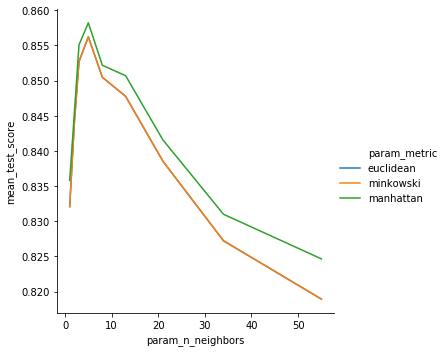

In [26]:
sns.relplot(x= 'param_n_neighbors', y = 'mean_test_score' , hue='param_metric', data=df_grille_knn, kind='line' );
# manhattan overlap euclidean

In [51]:
clfrf_NSW = ensemble.RandomForestClassifier(n_jobs=-1,
                                            random_state=66, 
                                            criterion = 'gini', 
                                            max_depth = 8, 
                                            max_features = 'log2',
                                            n_estimators = 500)
                                               
clfrf_NSW.fit(X_train,y_train)


RandomForestClassifier(max_depth=8, max_features='log2', n_estimators=500,
                       n_jobs=-1, random_state=66)

In [52]:
y_pred_clfrf_NSW = clfrf.predict(X_test)
pd.crosstab(y_test, y_pred_clfrf_NSW_VIC, rownames = ['Classe Réelle'], colnames = ['Classe Prédite'])


Classe Prédite,0,1
Classe Réelle,,
0,10637,485
1,1629,1670


In [55]:
print(classification_report(y_pred_clfrf_NSW,y_test))
print('accuracy_score',accuracy_score(y_pred_clfrf_NSW, y_test))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91     12266
           1       0.51      0.77      0.61      2155

    accuracy                           0.85     14421
   macro avg       0.73      0.82      0.76     14421
weighted avg       0.89      0.85      0.87     14421

accuracy_score 0.8534082241176063


In [ ]:
################## VICTORIA DATA SET ################################

In [58]:


df_VIC.dropna(axis=0, how='any', subset=['RainToday','RainTomorrow'], inplace=True)

df_VIC['RainToday'] = df_VIC['RainToday'].replace (to_replace = ['Yes','No'], value = [1,0])
df_VIC['RainTomorrow'] = df_VIC['RainTomorrow'].replace (to_replace = ['Yes','No'], value = [1,0])

dummies5 = pd.get_dummies(df_VIC['WindGustDir'])
df_VIC = pd.concat([df_VIC,dummies5], axis = 1)

dummies6 = pd.get_dummies(df_VIC['Location'], prefix = 'Location')
df_VIC = pd.concat([df_VIC,dummies6], axis = 1)

dummies7 = pd.get_dummies(df_VIC['Region'], prefix = 'Region')
df_VIC = pd.concat([df_VIC,dummies7], axis = 1)

dummies8 = pd.get_dummies(df_VIC['Radar'], prefix = 'Radar')
df_VIC = pd.concat([df_VIC,dummies8], axis = 1)


df_VIC.drop(['WindGustDir', 'Location', 'Region', 'Radar'] , axis = 1, inplace=True)

df_std_VIC = df_VIC
num_var = df_std_VIC.select_dtypes(include = 'float64')
num = num_var.columns

# on ne prend pas les 'int64', car ces variables correspondent à year, month, day
#Standardisation:

scaler = StandardScaler()
df_std_VIC[num] = scaler.fit_transform(df_std_VIC[num])
#df_std_VIC.isnull().sum()

In [59]:
target_VIC = df_std_VIC['RainTomorrow']
data_VIC = df_std_VIC.drop('RainTomorrow', axis = 1)


In [60]:
X_train, X_test, y_train, y_test = train_test_split(data_VIC, target_VIC, test_size = 0.2, random_state = 66)

In [58]:
# instanziare un metodo semplice 

lr_VIC = LogisticRegression() # tested also max iteration = 10000 and tollerance: 0.01, 0.001, 1nd 0.0001 but doesnt work 
lr_VIC.fit(X_train, y_train)


# as C parameters I used the first 9 numbers of the fibonacci series neglecting the first number 
# (since is equal to the seccond one), but I inserted  0.1 insetead of 1.
# I used also diffrent solving methods: no gradient descendent method, since too slow for convergence

parameters = {'C':[0.1, 1, 2, 3, 5, 8, 13, 21, 34],
              'solver':['sag', 'saga', 'lbfgs']}

grid_lr_VIC = model_selection.GridSearchCV(estimator=lr_VIC, param_grid=parameters)
grille_VIC = grid_lr_VIC.fit(X_train, y_train)
print(pd.DataFrame.from_dict(grille_VIC.cv_results_).loc[:,['params', 'mean_test_score']])

print ('****************************************************************************')
print()
print ('Best params:', grid_lr_VIC.best_params_)
print ()
print ('****************************************************************************')


/Users/bernardinotirri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/bernardinotirri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/bernardinotirri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/bernardinotirri/opt/anaconda3/

/Users/bernardinotirri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/bernardinotirri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/s

/Users/bernardinotirri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/bernardinotirri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/s

/Users/bernardinotirri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/bernardinotirri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/bernardinotirri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/bernardinotirri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/bernardinotirri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of 

/Users/bernardinotirri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/bernardinotirri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/bernardinotirri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/bernardinotirri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/bernardinotirri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

/Users/bernardinotirri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/bernardinotirri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/s

                           params  mean_test_score
0     {'C': 0.1, 'solver': 'sag'}         0.791221
1    {'C': 0.1, 'solver': 'saga'}         0.763568
2   {'C': 0.1, 'solver': 'lbfgs'}         0.840061
3       {'C': 1, 'solver': 'sag'}         0.791275
4      {'C': 1, 'solver': 'saga'}         0.763623
5     {'C': 1, 'solver': 'lbfgs'}         0.840876
6       {'C': 2, 'solver': 'sag'}         0.790895
7      {'C': 2, 'solver': 'saga'}         0.763514
8     {'C': 2, 'solver': 'lbfgs'}         0.838268
9       {'C': 3, 'solver': 'sag'}         0.791112
10     {'C': 3, 'solver': 'saga'}         0.763568
11    {'C': 3, 'solver': 'lbfgs'}         0.840387
12      {'C': 5, 'solver': 'sag'}         0.791275
13     {'C': 5, 'solver': 'saga'}         0.763460
14    {'C': 5, 'solver': 'lbfgs'}         0.840767
15      {'C': 8, 'solver': 'sag'}         0.791166
16     {'C': 8, 'solver': 'saga'}         0.763460
17    {'C': 8, 'solver': 'lbfgs'}         0.838920
18     {'C': 13, 'solver': 'sag

/Users/bernardinotirri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [29]:
knn_VIC = neighbors.KNeighborsClassifier()
param_knn ={'n_neighbors': [1, 2, 3, 5, 8, 13, 21, 34, 55],
            'metric':['euclidean', 'minkowski', 'manhattan']}

grid_knn_VIC = model_selection.GridSearchCV(estimator=knn_VIC, param_grid=param_knn)
grille_knn_VIC = grid_knn_VIC.fit(X_train, y_train)

print(pd.DataFrame.from_dict(grille_knn_VIC.cv_results_).loc[:,['param_metric', 'param_n_neighbors','mean_test_score']])
df_grille_knn_VIC = pd.DataFrame.from_dict(grille_knn_VIC.cv_results_).loc[:,['param_metric', 'param_n_neighbors','mean_test_score']]

print ('****************************************************************************')
print()
print ('Best params:', grid_knn_VIC.best_params_)
print ()
print ('****************************************************************************')


   param_metric param_n_neighbors  mean_test_score
0     euclidean                 1         0.819362
1     euclidean                 2         0.825284
2     euclidean                 3         0.838811
3     euclidean                 5         0.837181
4     euclidean                 8         0.829086
5     euclidean                13         0.829847
6     euclidean                21         0.823437
7     euclidean                34         0.810072
8     euclidean                55         0.803498
9     minkowski                 1         0.819362
10    minkowski                 2         0.825284
11    minkowski                 3         0.838811
12    minkowski                 5         0.837181
13    minkowski                 8         0.829086
14    minkowski                13         0.829847
15    minkowski                21         0.823437
16    minkowski                34         0.810072
17    minkowski                55         0.803498
18    manhattan                

In [61]:
knn = neighbors.KNeighborsClassifier(metric ='manhattan', 
                                     n_neighbors = 5)

knn.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan')

In [62]:
y_pred_knn_VIC = knn.predict(X_test)
pd.crosstab(y_test, y_pred_knn_VIC, rownames = ['Classe Réelle'], colnames = ['Classe Prédite'])


Classe Prédite,0,1
Classe Réelle,,
0,3286,208
1,509,599


In [63]:
print(classification_report(y_pred_knn_VIC,y_test))
print('accuracy_score',accuracy_score(y_pred_knn_VIC, y_test))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90      3795
           1       0.54      0.74      0.63       807

    accuracy                           0.84      4602
   macro avg       0.74      0.80      0.76      4602
weighted avg       0.87      0.84      0.85      4602

accuracy_score 0.8441981747066493


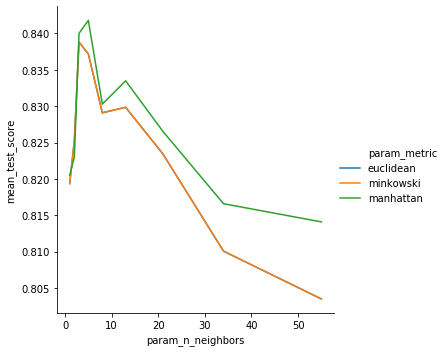

In [47]:
sns.relplot(x= 'param_n_neighbors', y = 'mean_test_score' , hue='param_metric', data=df_grille_knn_VIC, kind='line' );
# manhattan overlap euclidean

In [64]:
clfrf_VIC = ensemble.RandomForestClassifier(n_jobs=-1,
                                            random_state=66, 
                                            criterion = 'gini', 
                                            max_depth = 8, 
                                            max_features = 'log2',
                                            n_estimators = 500)
                                               
clfrf_VIC.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, max_features='log2', n_estimators=500,
                       n_jobs=-1, random_state=66)

In [68]:
y_pred_clfrf_VIC = clfrf_VIC.predict(X_test)
pd.crosstab(y_test, y_pred_clfrf_VIC, rownames = ['Classe Réelle'], colnames = ['Classe Prédite'])

Classe Prédite,0,1
Classe Réelle,,
0,3374,120
1,631,477


In [69]:
print(classification_report(y_pred_clfrf_VIC,y_test))
print('accuracy_score',accuracy_score(y_pred_clfrf_VIC, y_test))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      4005
           1       0.43      0.80      0.56       597

    accuracy                           0.84      4602
   macro avg       0.70      0.82      0.73      4602
weighted avg       0.90      0.84      0.86      4602

accuracy_score 0.8368100825727944


In [81]:
################## VICTORIA DATA SET and NSW   ################################

In [80]:
df_NSW_VIC['RainToday'] = df_NSW_VIC['RainToday'].replace (to_replace = ['Yes','No'], value = [1,0])
df_NSW_VIC['RainTomorrow'] = df_NSW_VIC['RainTomorrow'].replace (to_replace = ['Yes','No'], value = [1,0])

dummies9 = pd.get_dummies(df_NSW_VIC['WindGustDir'])
df_NSW_VIC = pd.concat([df_NSW_VIC,dummies9], axis = 1)

dummies10 = pd.get_dummies(df_NSW_VIC['Location'], prefix = 'Location')
df_NSW_VIC = pd.concat([df_NSW_VIC,dummies10], axis = 1)

dummies11 = pd.get_dummies(df_NSW_VIC['Region'], prefix = 'Region')
df_NSW_VIC = pd.concat([df_NSW_VIC,dummies11], axis = 1)

dummies12 = pd.get_dummies(df_NSW_VIC['Radar'], prefix = 'Radar')
df_NSW_VIC = pd.concat([df_NSW_VIC,dummies12], axis = 1)


df_NSW_VIC.drop(['WindGustDir', 'Location', 'Region', 'Radar'] , axis = 1, inplace=True)

df_NSW_VIC.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 72105 entries, 0 to 23008
Data columns (total 65 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MinTemp                 72105 non-null  float64
 1   MaxTemp                 72105 non-null  float64
 2   Rainfall                72105 non-null  float64
 3   Evaporation             72105 non-null  float64
 4   Sunshine                72105 non-null  float64
 5   WindGustSpeed           72105 non-null  float64
 6   Humidity9am             72105 non-null  float64
 7   Humidity3pm             72105 non-null  float64
 8   Pressure9am             72105 non-null  float64
 9   Pressure3pm             72105 non-null  float64
 10  RainToday               72105 non-null  int64  
 11  RainTomorrow            72105 non-null  int64  
 12  year                    72105 non-null  int64  
 13  month                   72105 non-null  int64  
 14  day                     72105 non-null

In [81]:
df_std_NSW_VIC = df_NSW_VIC
num_var = df_std_NSW_VIC.select_dtypes(include = 'float64')
num = num_var.columns

# on ne prend pas les 'int64', car ces variables correspondent à year, month, day
#Standardisation:

scaler = StandardScaler()
df_std_NSW_VIC[num] = scaler.fit_transform(df_std_NSW_VIC[num])
#df_std_NSW_VIC.isnull().sum()

In [82]:
target_NSW_VIC = df_std_NSW_VIC['RainTomorrow']
data_NSW_VIC = df_std_NSW_VIC.drop('RainTomorrow', axis = 1)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(data_NSW_VIC, target_NSW_VIC, test_size = 0.2, random_state = 66)


In [9]:
lr = LogisticRegression() # tested also max iteration = 10000 and tollerance: 0.01, 0.001, 1nd 0.0001 but doesnt work 
lr.fit(X_train, y_train)


# as C parameters I used the first 9 numbers of the fibonacci series neglecting the first number 
# (since is equal to the seccond one), but I inserted  0.1 insetead of 1.
# I used also diffrent solving methods: no gradient descendent method, since too slow for convergence

parameters = {'C':[0.1, 1, 2, 3, 5, 8, 13, 21, 34],
              'solver':['sag', 'saga', 'lbfgs']}

grid_lr_NSW = model_selection.GridSearchCV(estimator=lr, param_grid=parameters)
grille = grid_lr_NSW.fit(X_train, y_train)
print(pd.DataFrame.from_dict(grille.cv_results_).loc[:,['params', 'mean_test_score']])

print ('Best params:', grid_lr_NSW.best_params_)


/Users/bernardinotirri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/bernardinotirri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/bernardinotirri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/bernardinotirri/opt/anaconda3/

/Users/bernardinotirri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/bernardinotirri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/s

/Users/bernardinotirri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/bernardinotirri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/bernardinotirri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (

/Users/bernardinotirri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/bernardinotirri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/bernardinotirri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/bernardinotirri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/bernardinotirri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

/Users/bernardinotirri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/bernardinotirri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/bernardinotirri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/bernardinotirri/opt/anaconda3/

/Users/bernardinotirri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/bernardinotirri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/s

                           params  mean_test_score
0     {'C': 0.1, 'solver': 'sag'}         0.826815
1    {'C': 0.1, 'solver': 'saga'}         0.806706
2   {'C': 0.1, 'solver': 'lbfgs'}         0.836263
3       {'C': 1, 'solver': 'sag'}         0.826798
4      {'C': 1, 'solver': 'saga'}         0.806758
5     {'C': 1, 'solver': 'lbfgs'}         0.834686
6       {'C': 2, 'solver': 'sag'}         0.826728
7      {'C': 2, 'solver': 'saga'}         0.806792
8     {'C': 2, 'solver': 'lbfgs'}         0.835760
9       {'C': 3, 'solver': 'sag'}         0.826832
10     {'C': 3, 'solver': 'saga'}         0.806740
11    {'C': 3, 'solver': 'lbfgs'}         0.835622
12      {'C': 5, 'solver': 'sag'}         0.826884
13     {'C': 5, 'solver': 'saga'}         0.806688
14    {'C': 5, 'solver': 'lbfgs'}         0.835899
15      {'C': 8, 'solver': 'sag'}         0.826850
16     {'C': 8, 'solver': 'saga'}         0.806636
17    {'C': 8, 'solver': 'lbfgs'}         0.835535
18     {'C': 13, 'solver': 'sag

/Users/bernardinotirri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [16]:

lr_NSW_VIC = LogisticRegression(C=0.1, solver='lbfgs') 
lr_NSW_VIC.fit(X_train, y_train)

y_pred_lr_NSW_VIC = lr_NSW_VIC.predict(X_test)
pd.crosstab(y_test, y_pred_lr_NSW_VIC, rownames = ['Classe Réelle'], colnames = ['Classe Prédite'])



/Users/bernardinotirri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Classe Prédite,0,1
Classe Réelle,,
0,10457,665
1,1717,1582


In [18]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred_lr_NSW_VIC)

0.4727681358816671

In [11]:
knn_NSW_VIC = neighbors.KNeighborsClassifier()
param_knn ={'n_neighbors': [1, 2, 3, 5, 8, 13, 21, 34, 55],
            'metric':['euclidean', 'minkowski', 'manhattan']}

grid_knn_NSW_VIC = model_selection.GridSearchCV(estimator=knn_NSW_VIC, param_grid=param_knn)
grille_knn_NSW_VIC = grid_knn_NSW_VIC.fit(X_train, y_train)

print(pd.DataFrame.from_dict(grille_knn_NSW_VIC.cv_results_).loc[:,['param_metric', 'param_n_neighbors','mean_test_score']])
df_grille_knn_NSW_VIC = pd.DataFrame.from_dict(grille_knn_NSW_VIC.cv_results_).loc[:,['param_metric', 'param_n_neighbors','mean_test_score']]

print ('****************************************************************************')
print ()
print ('Best params:', grid_knn_NSW_VIC.best_params_)
print ()
print ('****************************************************************************')




   param_metric param_n_neighbors  mean_test_score
0     euclidean                 1         0.826763
1     euclidean                 2         0.836558
2     euclidean                 3         0.846405
3     euclidean                 5         0.848294
4     euclidean                 8         0.842833
5     euclidean                13         0.841776
6     euclidean                21         0.835535
7     euclidean                34         0.824943
8     euclidean                55         0.817176
9     minkowski                 1         0.826763
10    minkowski                 2         0.836558
11    minkowski                 3         0.846405
12    minkowski                 5         0.848294
13    minkowski                 8         0.842833
14    minkowski                13         0.841776
15    minkowski                21         0.835535
16    minkowski                34         0.824943
17    minkowski                55         0.817176
18    manhattan                

In [84]:
knn_NSW_VIC = neighbors.KNeighborsClassifier(metric='manhattan', n_neighbors= 5 )
knn_NSW_VIC.fit(X_train, y_train)
y_pred_knn_NSW_VIC = knn_NSW_VIC.predict(X_test)
pd.crosstab(y_test, y_pred_knn_NSW_VIC, rownames = ['Classe Réelle'], colnames = ['Classe Prédite'])


Classe Prédite,0,1
Classe Réelle,,
0,10435,687
1,1448,1851


In [85]:
print(classification_report(y_pred_knn_NSW_VIC,y_test))
print('accuracy_score',accuracy_score(y_pred_knn_NSW_VIC, y_test))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91     11883
           1       0.56      0.73      0.63      2538

    accuracy                           0.85     14421
   macro avg       0.75      0.80      0.77     14421
weighted avg       0.87      0.85      0.86     14421

accuracy_score 0.8519520144234103


In [89]:
#from sklearn.metrics import cohen_kappa_score
#cohen_kappa_score(y_test, y_pred_knn_NSW_VIC)
print ('Recall score:',     recall_score(y_test, y_pred_knn_NSW_VIC))
print ('Accuracy score:',   accuracy_score(y_test, y_pred_knn_NSW_VIC))
print ('Preccision score:', precision_score(y_test, y_pred_knn_NSW_VIC))
print ('F1 score:',         f1_score(y_test, y_pred_knn_NSW_VIC))

Recall score: 0.561079114883298
Accuracy score: 0.8519520144234103
Preccision score: 0.7293144208037825
F1 score: 0.6342299126263492


In [ ]:
#### random FOREST

In [86]:
#### PARAMETERS FITTED ON ISLE
clfrf_NSW_VIC = ensemble.RandomForestClassifier(n_jobs=-1,
                                            random_state=66, 
                                            criterion = 'gini', 
                                            max_depth = 8, 
                                            max_features = 'log2',
                                            n_estimators = 500)
                                               
clfrf_NSW_VIC.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, max_features='log2', n_estimators=500,
                       n_jobs=-1, random_state=66)

In [87]:
y_clfrf_NSW_VIC = clfrf_NSW_VIC.predict(X_test)
pd.crosstab(y_test, y_clfrf_NSW_VIC, rownames = ['Classe Réelle'], colnames = ['Classe Prédite'])

Classe Prédite,0,1
Classe Réelle,,
0,10830,292
1,2110,1189


In [88]:
print(classification_report(y_clfrf_NSW_VIC,y_test))
print('accuracy_score',accuracy_score(y_clfrf_NSW_VIC, y_test))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90     12940
           1       0.36      0.80      0.50      1481

    accuracy                           0.83     14421
   macro avg       0.67      0.82      0.70     14421
weighted avg       0.91      0.83      0.86     14421

accuracy_score 0.8334373483114902


In [34]:
#from sklearn import ensemble
#clfrf = ensemble.RandomForestClassifier(n_jobs=-1, random_state=66)
#clfrf.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1, random_state=66)

In [91]:
clfrf_NSW_VIC = ensemble.RandomForestClassifier(n_jobs=-1, random_state=66, max_features = 'log2')
clfrf_NSW_VIC.fit(X_train,y_train)


param_rf = {'criterion': ['gini'],
            'n_estimators' : [300,400, 500, 600]}


grid_clfrf_NSW_VIC = model_selection.GridSearchCV(estimator=clfrf_NSW_VIC,
                                                  param_grid=param_rf)


grille_clfrf_NSW_VIC = grid_clfrf_NSW_VIC.fit(X_train, y_train)


In [101]:
print(pd.DataFrame.from_dict(grille_clfrf_NSW_VIC.cv_results_).loc[:,['param_criterion', 'param_n_estimators','mean_test_score']])
df_grille_clfrf_NSW_VIC = pd.DataFrame.from_dict(grille_clfrf_NSW_VIC.cv_results_).loc[:,['param_n_estimators','mean_test_score']]

print ('****************************************************************************')
print ()
print ('Best params:', grid_clfrf_NSW_VIC.best_params_)
print ()
print ('****************************************************************************')




  param_criterion param_n_estimators  mean_test_score
0            gini                300         0.854240
1            gini                400         0.854206
2            gini                500         0.854483
3            gini                600         0.853928
****************************************************************************

Best params: {'criterion': 'gini', 'n_estimators': 500}

****************************************************************************


In [103]:
clfrf_NSW_VIC = ensemble.RandomForestClassifier(n_jobs=-1,
                                                random_state=66,
                                                criterion = 'gini',
                                                n_estimators = 500)
clfrf_NSW_VIC.fit(X_train,y_train)

#pd.crosstab(y_test, y_pred_clrf_NSW_VIC, rownames = ['Classe Réelle'], colnames = ['Classe Prédite'])

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=66)

In [104]:
y_pred_clfrf_NSW_VIC = clfrf_NSW_VIC.predict(X_test)
pd.crosstab(y_test, y_pred_clfrf_NSW_VIC, rownames = ['Classe Réelle'], colnames = ['Classe Prédite'])


Classe Prédite,0,1
Classe Réelle,,
0,10625,497
1,1606,1693


In [105]:
print(classification_report(y_pred_clfrf_NSW_VIC,y_test))
print('accuracy_score',accuracy_score(y_pred_clfrf_NSW_VIC, y_test))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91     12231
           1       0.51      0.77      0.62      2190

    accuracy                           0.85     14421
   macro avg       0.73      0.82      0.76     14421
weighted avg       0.89      0.85      0.87     14421

accuracy_score 0.8541710006240899


In [107]:
print ('Recall score:',     recall_score(y_test, y_pred_clfrf_NSW_VIC))
print ('Accuracy score:',   accuracy_score(y_test, y_pred_clfrf_NSW_VIC))
print ('Preccision score:', precision_score(y_test, y_pred_clfrf_NSW_VIC))
print ('F1 score:',         f1_score(y_test, y_pred_clfrf_NSW_VIC))


Recall score: 0.5131858138829949
Accuracy score: 0.8541710006240899
Preccision score: 0.7730593607305936
F1 score: 0.6168701038440516
